In [42]:
#importing necessary packages
import numpy as np
import pandas as pd
from scipy import stats 
import math
import statsmodels.api as sm
import pylab as py
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from itertools import combinations, product
from sklearn.model_selection import KFold,cross_val_predict,cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression,RidgeCV, LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso, Ridge, LinearRegression, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
df = pd.read_csv('analytic_data2019.csv')
pd.set_option('display.max_columns', None)

/Users/nielsclausen/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,1,2,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,24

In [3]:
df

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Premature death numerator,Premature death denominator,Premature death CI low,Premature death CI high,Premature death (Black),Premature death (Hispanic),Premature death (White),Poor or fair health raw value,Poor or fair health numerator,Poor or fair health denominator,Poor or fair health CI low,Poor or fair health CI high,Poor physical health days raw value,Poor physical health days numerator,Poor physical health days denominator,Poor physical health days CI low,Poor physical health days CI high,Poor mental health days raw value,Poor mental health days numerator,Poor mental health days denominator,Poor mental health days CI low,Poor mental health days CI high,Low birthweight raw value,Low birthweight numerator,Low birthweight denominator,Low birthweight CI low,Low birthweight CI high,Low birthweight (Black),Low birthweight (Hispanic),Low birthweight (White),Adult smoking raw value,Adult smoking numerator,Adult smoking denominator,Adult smoking CI low,Adult smoking CI high,Adult obesity raw value,Adult obesity numerator,Adult obesity denominator,Adult obesity CI low,Adult obesity CI high,Food environment index raw value,Food environment index numerator,Food environment index denominator,Food environment index CI low,Food environment index CI high,Physical inactivity raw value,Physical inactivity numerator,Physical inactivity denominator,Physical inactivity CI low,Physical inactivity CI high,Access to exercise opportunities raw value,Access to exercise opportunities numerator,Access to exercise opportunities denominator,Access to exercise opportunities CI low,Access to exercise opportunities CI high,Excessive drinking raw value,Excessive drinking numerator,Excessive drinking denominator,Excessive drinking CI low,Excessive drinking CI high,Alcohol-impaired driving deaths raw value,Alcohol-impaired driving deaths numerator,Alcohol-impaired driving deaths denominator,Alcohol-impaired driving deaths CI low,Alcohol-impaired driving deaths CI high,Sexually transmitted infections raw value,Sexually transmitted infections numerator,Sexually transmitted infections denominator,Sexually transmitted infections CI low,Sexually transmitted infections CI high,Teen births raw value,Teen births numerator,Teen births denominator,Teen births CI low,Teen births CI high,Teen births (Black),Teen births (Hispanic),Teen births (White),Uninsured raw value,Uninsured numerator,Uninsured denominator,Uninsured CI low,Uninsured CI high,Primary care physicians raw value,Primary care physicians numerator,Primary care physicians denominator,Primary care physicians CI low,Primary care physicians CI high,Ratio of population to primary care physicians.,Dentists raw value,Dentists numerator,Dentists denominator,Dentists CI low,Dentists CI high,Ratio of population to dentists.,Mental health providers raw value,Mental health providers numerator,Mental health providers denominator,Mental health providers CI low,Mental health providers CI high,Ratio of population to mental health providers.,Preventable hospital stays raw value,Preventable hospital stays numerator,Preventable hospital stays denominator,Preventable hospital stays CI low,Preventable hospital stays CI high,Preventable hospital stays (Black),Preventable hospital stays (Hispanic),Preventable hospital stays (White),Mammography screening raw value,Mammography screening numerator,Mammography screening denominator,Mammography screening CI low,Mammography screening CI high,Mammography screening (Black),Mammography screening (Hispanic),Mammography screening (White),Flu vaccinations raw value,Flu vaccinations numerator,Flu vaccinations denominator,Flu vaccinations CI low,Flu vaccinations CI high,Flu vaccinations (Black),Flu vaccinations (Hispanic),Flu vaccinations (White),High school graduation raw value,High school graduation numerator,High school graduation denominator,High 

In [4]:
df = df.drop(df.index[0])

In [5]:
#checking shape
df.shape

(3194, 534)

In [6]:
#checking for nan values
df.isna().sum()

State FIPS Code                         0
County FIPS Code                        0
5-digit FIPS Code                       0
State Abbreviation                      0
Name                                    0
                                     ... 
Female population 18-44 raw value    3121
Female population 45-64 raw value    3121
Female population 65+ raw value      3121
Total female population raw value    3121
Population growth raw value          3121
Length: 534, dtype: int64

In [7]:
#checking for null values
df.isnull().sum()

State FIPS Code                         0
County FIPS Code                        0
5-digit FIPS Code                       0
State Abbreviation                      0
Name                                    0
                                     ... 
Female population 18-44 raw value    3121
Female population 45-64 raw value    3121
Female population 65+ raw value      3121
Total female population raw value    3121
Population growth raw value          3121
Length: 534, dtype: int64

In [8]:
df_columns = df.columns
df_columns = list(df_columns)
# df_columns

In [9]:
df.describe()

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Premature death numerator,Premature death denominator,Premature death CI low,Premature death CI high,Premature death (Black),Premature death (Hispanic),Premature death (White),Poor or fair health raw value,Poor or fair health numerator,Poor or fair health denominator,Poor or fair health CI low,Poor or fair health CI high,Poor physical health days raw value,Poor physical health days numerator,Poor physical health days denominator,Poor physical health days CI low,Poor physical health days CI high,Poor mental health days raw value,Poor mental health days numerator,Poor mental health days denominator,Poor mental health days CI low,Poor mental health days CI high,Low birthweight raw value,Low birthweight numerator,Low birthweight denominator,Low birthweight CI low,Low birthweight CI high,Low birthweight (Black),Low birthweight (Hispanic),Low birthweight (White),Adult smoking raw value,Adult smoking numerator,Adult smoking denominator,Adult smoking CI low,Adult smoking CI high,Adult obesity raw value,Adult obesity numerator,Adult obesity denominator,Adult obesity CI low,Adult obesity CI high,Food environment index raw value,Food environment index numerator,Food environment index denominator,Food environment index CI low,Food environment index CI high,Physical inactivity raw value,Physical inactivity numerator,Physical inactivity denominator,Physical inactivity CI low,Physical inactivity CI high,Access to exercise opportunities raw value,Access to exercise opportunities numerator,Access to exercise opportunities denominator,Access to exercise opportunities CI low,Access to exercise opportunities CI high,Excessive drinking raw value,Excessive drinking numerator,Excessive drinking denominator,Excessive drinking CI low,Excessive drinking CI high,Alcohol-impaired driving deaths raw value,Alcohol-impaired driving deaths numerator,Alcohol-impaired driving deaths denominator,Alcohol-impaired driving deaths CI low,Alcohol-impaired driving deaths CI high,Sexually transmitted infections raw value,Sexually transmitted infections numerator,Sexually transmitted infections denominator,Sexually transmitted infections CI low,Sexually transmitted infections CI high,Teen births raw value,Teen births numerator,Teen births denominator,Teen births CI low,Teen births CI high,Teen births (Black),Teen births (Hispanic),Teen births (White),Uninsured raw value,Uninsured numerator,Uninsured denominator,Uninsured CI low,Uninsured CI high,Primary care physicians raw value,Primary care physicians numerator,Primary care physicians denominator,Primary care physicians CI low,Primary care physicians CI high,Ratio of population to primary care physicians.,Dentists raw value,Dentists numerator,Dentists denominator,Dentists CI low,Dentists CI high,Ratio of population to dentists.,Mental health providers raw value,Mental health providers numerator,Mental health providers denominator,Mental health providers CI low,Mental health providers CI high,Ratio of population to mental health providers.,Preventable hospital stays raw value,Preventable hospital stays numerator,Preventable hospital stays denominator,Preventable hospital stays CI low,Preventable hospital stays CI high,Preventable hospital stays (Black),Preventable hospital stays (Hispanic),Preventable hospital stays (White),Mammography screening raw value,Mammography screening numerator,Mammography screening denominator,Mammography screening CI low,Mammography screening CI high,Mammography screening (Black),Mammography screening (Hispanic),Mammography screening (White),Flu vaccinations raw value,Flu vaccinations numerator,Flu vaccinations denominator,Flu vaccinations CI low,Flu vaccinations CI high,Flu vaccinations (Black),Flu vaccinations (Hispanic),Flu vaccinations (White),High school graduation raw value,High school graduation numerator,High school graduation denominator,High 

In [10]:
filter_out = ['numerator', 'denominator', 'CI low', 'CI high', 'Black', 'Hispanic', 'White']
for f in filter_out:
        df = df.loc[:, ~df.columns.str.contains(f)]

In [11]:
#renaming columns by placing an underscore between words to make it more usable
columns_name = df.columns
new_column_names = []
for column_name in columns_name:
    new_column_names.append(column_name.replace(" ", "_"))
print(new_column_names[:10])
df.columns = new_column_names

['State_FIPS_Code', 'County_FIPS_Code', '5-digit_FIPS_Code', 'State_Abbreviation', 'Name', 'Release_Year', 'County_Ranked_(Yes=1/No=0)', 'Premature_death_raw_value', 'Poor_or_fair_health_raw_value', 'Poor_physical_health_days_raw_value']


In [12]:
df1=df[['State_Abbreviation','Name','Release_Year','County_Ranked_(Yes=1/No=0)']]
df2 = df.iloc[:,7:].astype(float)
dfclean = df1.merge(df2, left_index=True,right_index=True)
dfclean.head()


,State_Abbreviation,Name,Release_Year,County_Ranked_(Yes=1/No=0),Premature_death_raw_value,Poor_or_fair_health_raw_value,Poor_physical_health_days_raw_value,Poor_mental_health_days_raw_value,Low_birthweight_raw_value,Adult_smoking_raw_value,Adult_obesity_raw_value,Food_environment_index_raw_value,Physical_inactivity_raw_value,Access_to_exercise_opportunities_raw_value,Excessive_drinking_raw_value,Alcohol-impaired_driving_deaths_raw_value,Sexually_transmitted_infections_raw_value,Teen_births_raw_value,Uninsured_raw_value,Primary_care_physicians_raw_value,Ratio_of_population_to_primary_care_physicians.,Dentists_raw_value,Ratio_of_population_to_dentists.,Mental_health_providers_raw_value,Ratio_of_population_to_mental_health_providers.,Preventable_hospital_stays_raw_value,Mammography_screening_raw_value,Flu_vaccinations_raw_value,High_school_graduation_raw_value,Some_college_raw_value,Unemployment_raw_value,Children_in_poverty_raw_value,Income_inequality_raw_value,Children_in_single-parent_households_raw_value,Social_associations_raw_value,Violent_crime_raw_value,Injury_deaths_raw_value,Air_pollution_-_particulate_matter_raw_value,Drinking_water_violations_raw_value,Severe_housing_problems_raw_value,Percentage_of_households_with_high_housing_costs,Percentage_of_households_with_overcrowding,Percentage_of_households_with_lack_of_kitchen_or_plumbing_facilities,Driving_alone_to_work_raw_value,Long_commute_-_driving_alone_raw_value,Life_expectancy_raw_value,Premature_age-adjusted_mortality_raw_value,Child_mortality_raw_value,Infant_mortality_raw_value,Frequent_physical_distress_raw_value,Frequent_mental_distress_raw_value,Diabetes_prevalence_raw_value,HIV_prevalence_raw_value,Food_insecurity_raw_value,Limited_access_to_healthy_foods_raw_value,Drug_overdose_deaths_raw_value,Motor_vehicle_crash_deaths_raw_value,Insufficient_sleep_raw_value,Uninsured_adults_raw_value,Uninsured_children_raw_value,Other_primary_care_providers_raw_value,Ratio_of_population_to_primary_care_providers_other_than_physicians.,Disconnected_youth_raw_value,Median_household_income_raw_value,Children_eligible_for_free_or_reduced_price_lunch_raw_value,Residential_segregation_-_non-white/white_raw_value,Homicides_raw_value,Firearm_fatalities_raw_value,Homeownership_raw_value,Severe_housing_cost_burden_raw_value,Population_raw_value,%_below_18_years_of_age_raw_value,%_65_and_older_raw_value,%_American_Indian_and_Alaskan_Native_raw_value,%_Asian_raw_value,%_Native_Hawaiian/Other_Pacific_Islander_raw_value,%_not_proficient_in_English_raw_value,%_Females_raw_value,%_Rural_raw_value,Communicable_disease_raw_value,Self-inflicted_injury_hospitalizations_raw_value,Cancer_incidence_raw_value,Coronary_heart_disease_hospitalizations_raw_value,Cerebrovascular_disease_hospitalizations_raw_value,Smoking_during_pregnancy_raw_value,Drug_arrests_raw_value,Opioid_hospital_visits_raw_value,Alcohol-related_hospitalizations_raw_value,Motor_vehicle_crash_occupancy_rate_raw_value,On-road_motor_vehicle_crash-related_ER_visits_raw_value,Off-road_motor_vehicle_crash-related_ER_visits_raw_value,Childhood_immunizations_raw_value,Reading_proficiency_raw_value,W-2_enrollment_raw_value,Poverty_raw_value,Older_adults_living_alone_raw_value,Hate_crimes_raw_value,Child_abuse_raw_value,Injury_hospitalizations_raw_value,Fall_fatalities_65+_raw_value,Year_structure_built_raw_value,Male_population_0-17_raw_value,Male_population_18-44_raw_value,Male_population_45-64_raw_value,Male_population_65+_raw_value,Total_male_population_raw_value,Female_population_0-17_raw_value,Female_population_18-44_raw_value,Female_population_45-64_raw_value,Female_population_65+_raw_value,Total_female_population_raw_value,Population_growth_raw_value
1,US,United States,2019,NaN,6900.630354,NaN,NaN,NaN,0.080893,NaN,0.285,7.7,0.222,0.838945,NaN,0.285715,497.3,24.710326,0.100089,0.000754,1325.716601,0.000684,1461.331847,0.002287,437.275036,NaN,NaN,NaN,0.846000,0.652256,0.043556,0.184,4.941486,0.332517,9.300353,386.464896,67.387264,N

In [13]:
dfclean.dropna(axis=0, subset=['County_Ranked_(Yes=1/No=0)'], inplace=True)
dfclean = dfclean.drop(columns = ['County_Ranked_(Yes=1/No=0)'])


In [14]:
dfclean

,State_Abbreviation,Name,Release_Year,Premature_death_raw_value,Poor_or_fair_health_raw_value,Poor_physical_health_days_raw_value,Poor_mental_health_days_raw_value,Low_birthweight_raw_value,Adult_smoking_raw_value,Adult_obesity_raw_value,Food_environment_index_raw_value,Physical_inactivity_raw_value,Access_to_exercise_opportunities_raw_value,Excessive_drinking_raw_value,Alcohol-impaired_driving_deaths_raw_value,Sexually_transmitted_infections_raw_value,Teen_births_raw_value,Uninsured_raw_value,Primary_care_physicians_raw_value,Ratio_of_population_to_primary_care_physicians.,Dentists_raw_value,Ratio_of_population_to_dentists.,Mental_health_providers_raw_value,Ratio_of_population_to_mental_health_providers.,Preventable_hospital_stays_raw_value,Mammography_screening_raw_value,Flu_vaccinations_raw_value,High_school_graduation_raw_value,Some_college_raw_value,Unemployment_raw_value,Children_in_poverty_raw_value,Income_inequality_raw_value,Children_in_single-parent_households_raw_value,Social_associations_raw_value,Violent_crime_raw_value,Injury_deaths_raw_value,Air_pollution_-_particulate_matter_raw_value,Drinking_water_violations_raw_value,Severe_housing_problems_raw_value,Percentage_of_households_with_high_housing_costs,Percentage_of_households_with_overcrowding,Percentage_of_households_with_lack_of_kitchen_or_plumbing_facilities,Driving_alone_to_work_raw_value,Long_commute_-_driving_alone_raw_value,Life_expectancy_raw_value,Premature_age-adjusted_mortality_raw_value,Child_mortality_raw_value,Infant_mortality_raw_value,Frequent_physical_distress_raw_value,Frequent_mental_distress_raw_value,Diabetes_prevalence_raw_value,HIV_prevalence_raw_value,Food_insecurity_raw_value,Limited_access_to_healthy_foods_raw_value,Drug_overdose_deaths_raw_value,Motor_vehicle_crash_deaths_raw_value,Insufficient_sleep_raw_value,Uninsured_adults_raw_value,Uninsured_children_raw_value,Other_primary_care_providers_raw_value,Ratio_of_population_to_primary_care_providers_other_than_physicians.,Disconnected_youth_raw_value,Median_household_income_raw_value,Children_eligible_for_free_or_reduced_price_lunch_raw_value,Residential_segregation_-_non-white/white_raw_value,Homicides_raw_value,Firearm_fatalities_raw_value,Homeownership_raw_value,Severe_housing_cost_burden_raw_value,Population_raw_value,%_below_18_years_of_age_raw_value,%_65_and_older_raw_value,%_American_Indian_and_Alaskan_Native_raw_value,%_Asian_raw_value,%_Native_Hawaiian/Other_Pacific_Islander_raw_value,%_not_proficient_in_English_raw_value,%_Females_raw_value,%_Rural_raw_value,Communicable_disease_raw_value,Self-inflicted_injury_hospitalizations_raw_value,Cancer_incidence_raw_value,Coronary_heart_disease_hospitalizations_raw_value,Cerebrovascular_disease_hospitalizations_raw_value,Smoking_during_pregnancy_raw_value,Drug_arrests_raw_value,Opioid_hospital_visits_raw_value,Alcohol-related_hospitalizations_raw_value,Motor_vehicle_crash_occupancy_rate_raw_value,On-road_motor_vehicle_crash-related_ER_visits_raw_value,Off-road_motor_vehicle_crash-related_ER_visits_raw_value,Childhood_immunizations_raw_value,Reading_proficiency_raw_value,W-2_enrollment_raw_value,Poverty_raw_value,Older_adults_living_alone_raw_value,Hate_crimes_raw_value,Child_abuse_raw_value,Injury_hospitalizations_raw_value,Fall_fatalities_65+_raw_value,Year_structure_built_raw_value,Male_population_0-17_raw_value,Male_population_18-44_raw_value,Male_population_45-64_raw_value,Male_population_65+_raw_value,Total_male_population_raw_value,Female_population_0-17_raw_value,Female_population_18-44_raw_value,Female_population_45-64_raw_value,Female_population_65+_raw_value,Total_female_population_raw_value,Population_growth_raw_value
3,AL,Autauga County,2019,8824.057123,0.184111,4.200578,4.306739,0.084757,0.191247,0.375,7.2,0.311,0.686775,0.168780,0.288136,341.2,26.524208,0.085010,0.000415,2409.391304,0.000324,3083.555556,0.000162,6167.111111,6599.0,0.44,0.41,0.900000,0.608547,0.038635,0.193,4.636664,0.247001,12.631731,272.282220,74.031808

In [15]:
#checking the data types for each column
for col in dfclean.columns:
    print(dfclean[col].dtypes, col)

object State_Abbreviation
object Name
object Release_Year
float64 Premature_death_raw_value
float64 Poor_or_fair_health_raw_value
float64 Poor_physical_health_days_raw_value
float64 Poor_mental_health_days_raw_value
float64 Low_birthweight_raw_value
float64 Adult_smoking_raw_value
float64 Adult_obesity_raw_value
float64 Food_environment_index_raw_value
float64 Physical_inactivity_raw_value
float64 Access_to_exercise_opportunities_raw_value
float64 Excessive_drinking_raw_value
float64 Alcohol-impaired_driving_deaths_raw_value
float64 Sexually_transmitted_infections_raw_value
float64 Teen_births_raw_value
float64 Uninsured_raw_value
float64 Primary_care_physicians_raw_value
float64 Ratio_of_population_to_primary_care_physicians.
float64 Dentists_raw_value
float64 Ratio_of_population_to_dentists.
float64 Mental_health_providers_raw_value
float64 Ratio_of_population_to_mental_health_providers.
float64 Preventable_hospital_stays_raw_value
float64 Mammography_screening_raw_value
float64 Flu_

In [16]:
dfMH=df[['State_Abbreviation','Name','Poor_mental_health_days_raw_value']]
dfMH.head()

,State_Abbreviation,Name,Poor_mental_health_days_raw_value
1,US,United States,NaN
2,AL,Alabama,4.577366748
3,AL,Autauga County,4.3067392835
4,AL,Baldwin County,4.2496487805
5,AL,Barbour County,4.634994147


In [17]:
for col in dfMH.columns:
    print(dfMH[col].dtypes, col)

object State_Abbreviation
object Name
object Poor_mental_health_days_raw_value


In [18]:
#changing the type of mental health days raw value from an object to a float
dfMH['Poor_mental_health_days_raw_value']=dfMH['Poor_mental_health_days_raw_value'].astype('float')

/Users/nielsclausen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
dfMH.groupby(['State_Abbreviation'])['Poor_mental_health_days_raw_value'].mean()

State_Abbreviation
AK    3.628074
AL    4.704501
AR    4.924327
AZ    4.235169
CA    3.799303
CO    3.537185
CT    3.569436
DC    3.542423
DE    3.699427
FL    4.114445
GA    4.003771
HI    3.213617
IA    3.239640
ID    3.896670
IL    3.654840
IN    4.058129
KS    3.286371
KY    4.567996
LA    4.373469
MA    4.089503
MD    3.676592
ME    4.046142
MI    4.194464
MN    3.043567
MO    4.477724
MS    4.262161
MT    3.446358
NC    4.207734
ND    2.821074
NE    3.084903
NH    3.956945
NJ    3.630897
NM    4.113549
NV    4.289857
NY    3.896642
OH    4.033907
OK    4.624741
OR    4.305022
PA    4.023892
RI    3.980515
SC    4.538176
SD    3.047884
TN    4.772298
TX    3.642530
US         NaN
UT    3.642852
VA    3.686634
VT    4.019806
WA    3.952271
WI    3.552020
WV    5.122217
WY    3.473783
Name: Poor_mental_health_days_raw_value, dtype: float64

Text(0.5, 0, 'State')

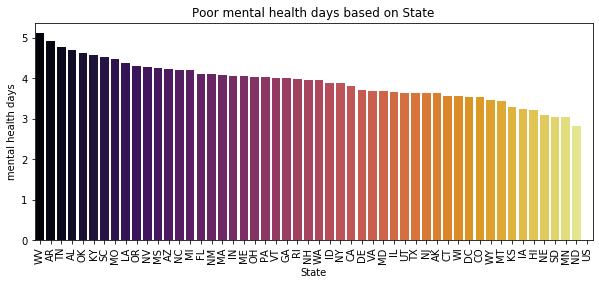

In [20]:
#Poor mental health days based on state graph
fig,ax = plt.subplots(1,1,figsize=(10,4))

cnt = dfMH.groupby(['State_Abbreviation'])['Poor_mental_health_days_raw_value'].mean().sort_values(ascending=False).to_frame()
sns.barplot(y = cnt['Poor_mental_health_days_raw_value'], x = cnt.index, palette= 'inferno')
ax.set_title('Poor mental health days based on State')
ax.set_ylabel('mental health days')
plt.xticks(rotation= 'vertical') 
ax.set_xlabel('State')

In [21]:
dfclean

,State_Abbreviation,Name,Release_Year,Premature_death_raw_value,Poor_or_fair_health_raw_value,Poor_physical_health_days_raw_value,Poor_mental_health_days_raw_value,Low_birthweight_raw_value,Adult_smoking_raw_value,Adult_obesity_raw_value,Food_environment_index_raw_value,Physical_inactivity_raw_value,Access_to_exercise_opportunities_raw_value,Excessive_drinking_raw_value,Alcohol-impaired_driving_deaths_raw_value,Sexually_transmitted_infections_raw_value,Teen_births_raw_value,Uninsured_raw_value,Primary_care_physicians_raw_value,Ratio_of_population_to_primary_care_physicians.,Dentists_raw_value,Ratio_of_population_to_dentists.,Mental_health_providers_raw_value,Ratio_of_population_to_mental_health_providers.,Preventable_hospital_stays_raw_value,Mammography_screening_raw_value,Flu_vaccinations_raw_value,High_school_graduation_raw_value,Some_college_raw_value,Unemployment_raw_value,Children_in_poverty_raw_value,Income_inequality_raw_value,Children_in_single-parent_households_raw_value,Social_associations_raw_value,Violent_crime_raw_value,Injury_deaths_raw_value,Air_pollution_-_particulate_matter_raw_value,Drinking_water_violations_raw_value,Severe_housing_problems_raw_value,Percentage_of_households_with_high_housing_costs,Percentage_of_households_with_overcrowding,Percentage_of_households_with_lack_of_kitchen_or_plumbing_facilities,Driving_alone_to_work_raw_value,Long_commute_-_driving_alone_raw_value,Life_expectancy_raw_value,Premature_age-adjusted_mortality_raw_value,Child_mortality_raw_value,Infant_mortality_raw_value,Frequent_physical_distress_raw_value,Frequent_mental_distress_raw_value,Diabetes_prevalence_raw_value,HIV_prevalence_raw_value,Food_insecurity_raw_value,Limited_access_to_healthy_foods_raw_value,Drug_overdose_deaths_raw_value,Motor_vehicle_crash_deaths_raw_value,Insufficient_sleep_raw_value,Uninsured_adults_raw_value,Uninsured_children_raw_value,Other_primary_care_providers_raw_value,Ratio_of_population_to_primary_care_providers_other_than_physicians.,Disconnected_youth_raw_value,Median_household_income_raw_value,Children_eligible_for_free_or_reduced_price_lunch_raw_value,Residential_segregation_-_non-white/white_raw_value,Homicides_raw_value,Firearm_fatalities_raw_value,Homeownership_raw_value,Severe_housing_cost_burden_raw_value,Population_raw_value,%_below_18_years_of_age_raw_value,%_65_and_older_raw_value,%_American_Indian_and_Alaskan_Native_raw_value,%_Asian_raw_value,%_Native_Hawaiian/Other_Pacific_Islander_raw_value,%_not_proficient_in_English_raw_value,%_Females_raw_value,%_Rural_raw_value,Communicable_disease_raw_value,Self-inflicted_injury_hospitalizations_raw_value,Cancer_incidence_raw_value,Coronary_heart_disease_hospitalizations_raw_value,Cerebrovascular_disease_hospitalizations_raw_value,Smoking_during_pregnancy_raw_value,Drug_arrests_raw_value,Opioid_hospital_visits_raw_value,Alcohol-related_hospitalizations_raw_value,Motor_vehicle_crash_occupancy_rate_raw_value,On-road_motor_vehicle_crash-related_ER_visits_raw_value,Off-road_motor_vehicle_crash-related_ER_visits_raw_value,Childhood_immunizations_raw_value,Reading_proficiency_raw_value,W-2_enrollment_raw_value,Poverty_raw_value,Older_adults_living_alone_raw_value,Hate_crimes_raw_value,Child_abuse_raw_value,Injury_hospitalizations_raw_value,Fall_fatalities_65+_raw_value,Year_structure_built_raw_value,Male_population_0-17_raw_value,Male_population_18-44_raw_value,Male_population_45-64_raw_value,Male_population_65+_raw_value,Total_male_population_raw_value,Female_population_0-17_raw_value,Female_population_18-44_raw_value,Female_population_45-64_raw_value,Female_population_65+_raw_value,Total_female_population_raw_value,Population_growth_raw_value
3,AL,Autauga County,2019,8824.057123,0.184111,4.200578,4.306739,0.084757,0.191247,0.375,7.2,0.311,0.686775,0.168780,0.288136,341.2,26.524208,0.085010,0.000415,2409.391304,0.000324,3083.555556,0.000162,6167.111111,6599.0,0.44,0.41,0.900000,0.608547,0.038635,0.193,4.636664,0.247001,12.631731,272.282220,74.031808

### MODELLING

In [22]:
for col in dfclean.columns:
    print(dfclean[col].isna().sum(), col)

0 State_Abbreviation
0 Name
0 Release_Year
61 Premature_death_raw_value
0 Poor_or_fair_health_raw_value
0 Poor_physical_health_days_raw_value
0 Poor_mental_health_days_raw_value
107 Low_birthweight_raw_value
0 Adult_smoking_raw_value
0 Adult_obesity_raw_value
19 Food_environment_index_raw_value
0 Physical_inactivity_raw_value
6 Access_to_exercise_opportunities_raw_value
0 Excessive_drinking_raw_value
33 Alcohol-impaired_driving_deaths_raw_value
158 Sexually_transmitted_infections_raw_value
144 Teen_births_raw_value
1 Uninsured_raw_value
135 Primary_care_physicians_raw_value
135 Ratio_of_population_to_primary_care_physicians.
85 Dentists_raw_value
85 Ratio_of_population_to_dentists.
252 Mental_health_providers_raw_value
252 Ratio_of_population_to_mental_health_providers.
38 Preventable_hospital_stays_raw_value
19 Mammography_screening_raw_value
16 Flu_vaccinations_raw_value
99 High_school_graduation_raw_value
0 Some_college_raw_value
1 Unemployment_raw_value
1 Children_in_poverty_raw_va

In [23]:
dfreg = dfclean
dfreg.iloc[:,1:] = dfreg.groupby("State_Abbreviation").transform(lambda x: x.fillna(x.median()))
dfreg = dfreg.drop(columns = ['Name', 'Release_Year', 'State_Abbreviation'])
dfreg = dfreg.dropna(axis='columns')
dfreg


,Premature_death_raw_value,Poor_or_fair_health_raw_value,Poor_physical_health_days_raw_value,Poor_mental_health_days_raw_value,Low_birthweight_raw_value,Adult_smoking_raw_value,Adult_obesity_raw_value,Food_environment_index_raw_value,Physical_inactivity_raw_value,Access_to_exercise_opportunities_raw_value,Excessive_drinking_raw_value,Alcohol-impaired_driving_deaths_raw_value,Sexually_transmitted_infections_raw_value,Teen_births_raw_value,Uninsured_raw_value,Primary_care_physicians_raw_value,Ratio_of_population_to_primary_care_physicians.,Dentists_raw_value,Ratio_of_population_to_dentists.,Mental_health_providers_raw_value,Ratio_of_population_to_mental_health_providers.,Preventable_hospital_stays_raw_value,Mammography_screening_raw_value,Flu_vaccinations_raw_value,High_school_graduation_raw_value,Some_college_raw_value,Unemployment_raw_value,Children_in_poverty_raw_value,Income_inequality_raw_value,Children_in_single-parent_households_raw_value,Social_associations_raw_value,Violent_crime_raw_value,Injury_deaths_raw_value,Severe_housing_problems_raw_value,Percentage_of_households_with_high_housing_costs,Percentage_of_households_with_overcrowding,Percentage_of_households_with_lack_of_kitchen_or_plumbing_facilities,Driving_alone_to_work_raw_value,Long_commute_-_driving_alone_raw_value,Life_expectancy_raw_value,Premature_age-adjusted_mortality_raw_value,Child_mortality_raw_value,Infant_mortality_raw_value,Frequent_physical_distress_raw_value,Frequent_mental_distress_raw_value,Diabetes_prevalence_raw_value,Food_insecurity_raw_value,Limited_access_to_healthy_foods_raw_value,Drug_overdose_deaths_raw_value,Motor_vehicle_crash_deaths_raw_value,Insufficient_sleep_raw_value,Uninsured_adults_raw_value,Uninsured_children_raw_value,Other_primary_care_providers_raw_value,Ratio_of_population_to_primary_care_providers_other_than_physicians.,Disconnected_youth_raw_value,Median_household_income_raw_value,Residential_segregation_-_non-white/white_raw_value,Homicides_raw_value,Firearm_fatalities_raw_value,Homeownership_raw_value,Severe_housing_cost_burden_raw_value,Population_raw_value,%_below_18_years_of_age_raw_value,%_65_and_older_raw_value,%_American_Indian_and_Alaskan_Native_raw_value,%_Asian_raw_value,%_Native_Hawaiian/Other_Pacific_Islander_raw_value,%_not_proficient_in_English_raw_value,%_Females_raw_value,%_Rural_raw_value
3,8824.057123,0.184111,4.200578,4.306739,0.084757,0.191247,0.375,7.2,0.311,0.686775,0.168780,0.288136,341.2,26.524208,0.085010,0.000415,2409.391304,0.000324,3083.555556,0.000162,6167.111111,6599.0,0.44,0.41,0.900000,0.608547,0.038635,0.193,4.636664,0.247001,12.631731,272.282220,74.031808,0.149546,0.132052,0.024516,0.006374,0.859651,0.383,76.330589,438.7,53.279441,7.699275,0.128244,0.126384,0.142,0.134,0.119911,9.623076,20.377158,0.359054,0.109611,0.024762,0.000306,3264.941176,0.080117,58343.0,27.147569,5.2,17.7,0.732877,0.126452,55504.0,0.239370,0.151196,0.004756,0.012792,0.001045,0.008285,0.513422,0.420022
4,7224.632160,0.180605,4.098748,4.249649,0.083387,0.167955,0.310,8.0,0.238,0.719710,0.167150,0.318750,338.8,29.594009,0.106993,0.000729,1372.125000,0.000499,2005.924528,0.000912,1096.020619,3833.0,0.45,0.45,0.863616,0.661339,0.039883,0.147,4.518560,0.251841,10.692213,203.660396,69.374289,0.138317,0.125693,0.010728,0.006072,0.847194,0.405,78.599498,348.4,47.000017,5.851337,0.126220,0.128226,0.113,0.123,0.054244,16.322612,15.092364,0.333059,0.135703,0.032380,0.000522,1915.567568,0.078257,56607.0,33.240059,2.9,14.4,0.728593,0.127959,212628.0,0.218485,0.199470,0.007760,0.011565,0.000687,0.004545,0.514528,0.422791
5,9586.165037,0.257734,5.067438,4.634994,0.109526,0.215409,0.443,5.6,0.282,0.536257,0.126987,0.296296,557.9,45.092838,0.125132,0.000385,2596.500000,0.000356,2807.777778,0.000079,12635.000000,4736.0,0.46,0.37,0.814103,0.367740,0.059009,0.503,5.755063,0.572157,8.472944,414.277861,72.900134,0.154555,0.136743,0.020065,0.008134,0.834044,0.338,75.779457,469.8,77.080027,8.064516,0.162162,0.146323,0.180,0.232,0.107397,14

In [24]:
for col in dfreg.columns:
    print(dfreg[col].isna().sum(), col)

0 Premature_death_raw_value
0 Poor_or_fair_health_raw_value
0 Poor_physical_health_days_raw_value
0 Poor_mental_health_days_raw_value
0 Low_birthweight_raw_value
0 Adult_smoking_raw_value
0 Adult_obesity_raw_value
0 Food_environment_index_raw_value
0 Physical_inactivity_raw_value
0 Access_to_exercise_opportunities_raw_value
0 Excessive_drinking_raw_value
0 Alcohol-impaired_driving_deaths_raw_value
0 Sexually_transmitted_infections_raw_value
0 Teen_births_raw_value
0 Uninsured_raw_value
0 Primary_care_physicians_raw_value
0 Ratio_of_population_to_primary_care_physicians.
0 Dentists_raw_value
0 Ratio_of_population_to_dentists.
0 Mental_health_providers_raw_value
0 Ratio_of_population_to_mental_health_providers.
0 Preventable_hospital_stays_raw_value
0 Mammography_screening_raw_value
0 Flu_vaccinations_raw_value
0 High_school_graduation_raw_value
0 Some_college_raw_value
0 Unemployment_raw_value
0 Children_in_poverty_raw_value
0 Income_inequality_raw_value
0 Children_in_single-parent_hous

In [25]:
for col in dfreg.columns:
    print(dfreg[col].isnull().sum(), col)

0 Premature_death_raw_value
0 Poor_or_fair_health_raw_value
0 Poor_physical_health_days_raw_value
0 Poor_mental_health_days_raw_value
0 Low_birthweight_raw_value
0 Adult_smoking_raw_value
0 Adult_obesity_raw_value
0 Food_environment_index_raw_value
0 Physical_inactivity_raw_value
0 Access_to_exercise_opportunities_raw_value
0 Excessive_drinking_raw_value
0 Alcohol-impaired_driving_deaths_raw_value
0 Sexually_transmitted_infections_raw_value
0 Teen_births_raw_value
0 Uninsured_raw_value
0 Primary_care_physicians_raw_value
0 Ratio_of_population_to_primary_care_physicians.
0 Dentists_raw_value
0 Ratio_of_population_to_dentists.
0 Mental_health_providers_raw_value
0 Ratio_of_population_to_mental_health_providers.
0 Preventable_hospital_stays_raw_value
0 Mammography_screening_raw_value
0 Flu_vaccinations_raw_value
0 High_school_graduation_raw_value
0 Some_college_raw_value
0 Unemployment_raw_value
0 Children_in_poverty_raw_value
0 Income_inequality_raw_value
0 Children_in_single-parent_hous

In [26]:
dfreg.describe()

,Premature_death_raw_value,Poor_or_fair_health_raw_value,Poor_physical_health_days_raw_value,Poor_mental_health_days_raw_value,Low_birthweight_raw_value,Adult_smoking_raw_value,Adult_obesity_raw_value,Food_environment_index_raw_value,Physical_inactivity_raw_value,Access_to_exercise_opportunities_raw_value,Excessive_drinking_raw_value,Alcohol-impaired_driving_deaths_raw_value,Sexually_transmitted_infections_raw_value,Teen_births_raw_value,Uninsured_raw_value,Primary_care_physicians_raw_value,Ratio_of_population_to_primary_care_physicians.,Dentists_raw_value,Ratio_of_population_to_dentists.,Mental_health_providers_raw_value,Ratio_of_population_to_mental_health_providers.,Preventable_hospital_stays_raw_value,Mammography_screening_raw_value,Flu_vaccinations_raw_value,High_school_graduation_raw_value,Some_college_raw_value,Unemployment_raw_value,Children_in_poverty_raw_value,Income_inequality_raw_value,Children_in_single-parent_households_raw_value,Social_associations_raw_value,Violent_crime_raw_value,Injury_deaths_raw_value,Severe_housing_problems_raw_value,Percentage_of_households_with_high_housing_costs,Percentage_of_households_with_overcrowding,Percentage_of_households_with_lack_of_kitchen_or_plumbing_facilities,Driving_alone_to_work_raw_value,Long_commute_-_driving_alone_raw_value,Life_expectancy_raw_value,Premature_age-adjusted_mortality_raw_value,Child_mortality_raw_value,Infant_mortality_raw_value,Frequent_physical_distress_raw_value,Frequent_mental_distress_raw_value,Diabetes_prevalence_raw_value,Food_insecurity_raw_value,Limited_access_to_healthy_foods_raw_value,Drug_overdose_deaths_raw_value,Motor_vehicle_crash_deaths_raw_value,Insufficient_sleep_raw_value,Uninsured_adults_raw_value,Uninsured_children_raw_value,Other_primary_care_providers_raw_value,Ratio_of_population_to_primary_care_providers_other_than_physicians.,Disconnected_youth_raw_value,Median_household_income_raw_value,Residential_segregation_-_non-white/white_raw_value,Homicides_raw_value,Firearm_fatalities_raw_value,Homeownership_raw_value,Severe_housing_cost_burden_raw_value,Population_raw_value,%_below_18_years_of_age_raw_value,%_65_and_older_raw_value,%_American_Indian_and_Alaskan_Native_raw_value,%_Asian_raw_value,%_Native_Hawaiian/Other_Pacific_Islander_raw_value,%_not_proficient_in_English_raw_value,%_Females_raw_value,%_Rural_raw_value
count,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3.142000e+03,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000
mean,8462.386017,0.174833,3.922021,3.932145,0.080756,0.178726,0.320715,7.467696,0.257000,0.629375,0.174114,0.293115,379.214258,31.897495,0.111365,0.000543,2567.700085,0.000451,2824.265502,0.001441,1829.769703,4811.877626,0.399346,0.404095,0.882564,0.576105,0.046180,0.215475,4.515198,0.323924,13.783436,248.846771,85.000795,0.142363,0.114254,0.024131,0.012605,0.795246,0.309554,77.469110,406.036362,60.997345,6.610617,0.119901,0.122096,0.116264,0.136975,0.086297,18.783843,18.913694,0.330426,0.132854,0.058620,0.000769,1848.552310,0.088104,51098.339115,30.723746,5.386744,14.785582,0.713382,0.114958,1.036662e+05,0.222349,0.188134,0.023302,0.015272,0.001369,0.017312,0.498935,0.586348
std,2713.205981,0.046994,0.714456,0.613682,0.020314,0.036601,0.045890,1.163198,0.051734,0.230832,0.03242

In [39]:
X_base = dfreg[['Poor_physical_health_days_raw_value', 'Median_household_income_raw_value', 'Unemployment_raw_value', 'Income_inequality_raw_value']]
y_base = dfreg['Poor_mental_health_days_raw_value']


In [46]:
base_reg = LinearRegression().fit(X_base, y_base)
base_reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
X = dfreg[[ 
          'Poor_physical_health_days_raw_value', 'Frequent_physical_distress_raw_value', 
          'Poor_or_fair_health_raw_value', 'Adult_smoking_raw_value', 'Insufficient_sleep_raw_value', 
          'Diabetes_prevalence_raw_value', 'Premature_age-adjusted_mortality_raw_value', 
           'Children_in_poverty_raw_value',
          'Life_expectancy_raw_value', 'Excessive_drinking_raw_value', 'Food_insecurity_raw_value', 
          'Premature_death_raw_value', 'Median_household_income_raw_value', 'Some_college_raw_value', 
          'Physical_inactivity_raw_value', 'Children_in_single-parent_households_raw_value', 
          'Teen_births_raw_value', 'Low_birthweight_raw_value', 'Unemployment_raw_value', 
          'Income_inequality_raw_value', 'Food_environment_index_raw_value']]
y = dfreg['Poor_mental_health_days_raw_value']

In [60]:
X.corr()

,Poor_physical_health_days_raw_value,Frequent_physical_distress_raw_value,Poor_or_fair_health_raw_value,Adult_smoking_raw_value,Insufficient_sleep_raw_value,Diabetes_prevalence_raw_value,Premature_age-adjusted_mortality_raw_value,Children_in_poverty_raw_value,Life_expectancy_raw_value,Excessive_drinking_raw_value,Food_insecurity_raw_value,Premature_death_raw_value,Median_household_income_raw_value,Some_college_raw_value,Physical_inactivity_raw_value,Children_in_single-parent_households_raw_value,Teen_births_raw_value,Low_birthweight_raw_value,Unemployment_raw_value,Income_inequality_raw_value,Food_environment_index_raw_value
Poor_physical_health_days_raw_value,1.000000,0.982362,0.880319,0.805291,0.684522,0.641261,0.705673,0.755713,-0.666863,-0.645317,0.651590,0.648600,-0.653553,-0.640609,0.549584,0.543557,0.638416,0.497080,0.550502,0.465357,-0.497359
Frequent_physical_distress_raw_value,0.982362,1.000000,0.929960,0.814891,0.668226,0.628895,0.724223,0.814810,-0.672200,-0.655196,0.694427,0.673773,-0.694024,-0.653320,0.547685,0.593152,0.681024,0.529200,0.571303,0.515714,-0.558223
Poor_or_fair_health_raw_value,0.880319,0.929960,1.000000,0.726768,0.657575,0.603307,0.699706,0.831823,-0.635981,-0.661190,0.679700,0.639134,-0.672703,-0.673797,0.568656,0.622916,0.742203,0.590922,0.541126,0.537020,-0.563065
Adult_smoking_raw_value,0.805291,0.814891,0.726768,1.000000,0.642795,0.623386,0.712854,0.650070,-0.696415,-0.447061,0.591043,0.661311,-0.598337,-0.546489,0.603679,0.519928,0.578458,0.434061,0.459219,0.372044,-0.449468
Insufficient_sleep_raw_value,0.684522,0.668226,0.657575,0.642795,1.000000,0.604086,0.529562,0.518363,-0.527680,-0.455225,0.526767,0.453672,-0.315635,-0.459577,0.479812,0.549934,0.393412,0.546485,0.462443,0.400389,-0.280586
Diabetes_prevalence_raw_value,0.641261,0.628895,0.603307,0.623386,0.604086,1.000000,0.664173,0.602023,-0.646984,-0.661436,0.543823,0.606889,-0.565106,-0.528492,0.756009,0.459367,0.474389,0.490788,0.362987,0.282595,-0.357877
Premature_age-adjusted_mortality_raw_value,0.705673,0.724223,0.699706,0.712854,0.529562,0.664173,1.000000,0.722495,-0.927395,-0.586055,0.649455,0.948596,-0.662527,-0.562957,0.635338,0.545577,0.712528,0.524423,0.442533,0.426487,-0.527855
Children_in_poverty_raw_value,0.755713,0.814810,0.831823,0.650070,0.518363,0.602023,0.722495,1.000000,-0.644099,-0.608921,0.748820,0.683106,-0.793816,-0.645383,0.523820,0.667258,0.707173,0.602525,0.569234,0.552483,-0.641389
Life_expectancy_raw_value,-0.666863,-0.672200,-0.635981,-0.696415,-0.527680,-0.646984,-0.927395,-0.644099,1.000000,0.540338,-0.598144,-0.869080,0.619875,0.528593,-0.626456,-0.501152,-0.655433,-0.472412,-0.406219,-0.360097,0.437772
Excessive_drinking_raw_value,-0.645317,-0.655196,-0.661190,-0.447061,-0.455225,-0.661436,-0.586055,-0.608921,0.540338,1.000000,-0.543204,-0.545823,0.539410,0.508525,-0.562618,-0.371649,-0.525474,-0.506781,-0.323430,-0.301797,0.434478


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=42, 
                                                    train_size=0.75)
# Scaling the data
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [88]:
# Instantiate PolynomialFeatures
poly = PolynomialFeatures(2)

# Fit and transform X_train
X_poly_train = poly.fit_transform(X_train)

# Instantiate and fit a linear regression model to the polynomial transformed train features
reg_poly = LinearRegression().fit(X_poly_train, y_train)

# Transform the test data into polynomial features
X_poly_test = poly.transform(X_test)

# Get predeicted values for polynomial training data to compute MSE
y_trainpred = reg_poly.predict(X_poly_train)

# Get predicted values for transformed polynomial test data  
y_pred = reg_poly.predict(X_poly_test)

# Evaluate model performance on test data
print("degree %d" % 2, r2_score(y_test, y_pred))

# Transform the full data
X_poly = poly.transform(X)

# Now, we want to see what the model predicts for the entire data  
y_poly = reg_poly.predict(X_poly)

degree 2 0.9090307228305778


In [84]:
# The coefficients
print('Coefficients: \n', reg_poly.coef_)
train_mse = mean_squared_error(y_train, y_trainpred)
print('Train Mean Squarred Error:', train_mse)
print('r_squared_score:',r2_score(y_train, y_trainpred))

Coefficients: 
 [[-4.87110493e-02  8.88109973e+00 -1.78899018e+02 -2.12445617e+01
  -1.99065242e+01  2.60726692e+01  1.72048036e+01 -2.24560000e-04
   9.06084936e+00  1.88990301e-02  5.28631159e+01  1.00510008e+01
  -3.58854549e-04 -6.41642742e-05 -3.98442527e+00 -6.35671500e+00
   3.15689952e+00 -3.18556314e-02 -2.25871776e+01  1.67424510e+01
  -5.55315272e-01  1.93972168e-01  8.65253110e-01 -8.00393229e+01
   9.77545394e+00  6.04522936e+00  2.83990086e+00 -1.45692109e+00
   1.13607417e-04  1.20566948e+00 -1.40353071e-02 -1.16788309e+01
  -9.81726855e+00 -2.97690104e-05 -1.40279945e-05  4.78021488e-01
  -3.20946947e+00  2.33291513e-02 -6.26415550e-03 -6.05734546e+00
  -6.28986468e+00  2.82167567e-03 -3.07976307e-01  1.42815476e+03
  -2.26679497e+02 -2.25153306e+02 -1.13395637e+02  1.22415722e+02
  -1.69566384e-02 -9.85339937e+01  4.05803373e-01  2.61962071e+02
   3.77355809e+02  2.68962119e-03  4.00035094e-04 -3.88508709e+01
   6.13489933e+01 -5.95782589e+00  1.25375368e-01  2.1632816

In [86]:
poly = PolynomialFeatures(2)
X_poly_train = poly.fit_transform(X_train)
X_poly_train_scaled = scaler.fit_transform(X_poly_train)
X_test_poly = poly.transform(X_test)
X_test_poly_scaled = scaler.transform(X_test_poly)

In [68]:
def Regularisation(X, y, r, t, w):

    r2r = []
    mser = []
    r2r_train = []
    mser_train = []


    for i in np.arange(1,r):
        ridge = Ridge(alpha = i).fit(X, y)
        model_scores = cross_validate(ridge, X, y, scoring=('r2', 'neg_mean_squared_error'), cv=5,return_train_score=True)
        r2r.append(np.mean(model_scores['test_r2']))
        mser.append(np.mean(model_scores['test_neg_mean_squared_error']))
        r2r_train.append(np.mean(model_scores['train_r2']))
        mser_train.append(np.mean(model_scores['train_neg_mean_squared_error']))



    r2l = []
    msel = []
    r2l_train = []
    msel_train = []

    for i in np.linspace(0.1, t, 10):
        lasso = Lasso(alpha=i).fit(X, y)
        model_scores = cross_validate(lasso, X, y, scoring=('r2', 'neg_mean_squared_error'), cv=5,return_train_score=True)
        r2l.append(np.mean(model_scores['test_r2']))
        msel.append(np.mean(model_scores['test_neg_mean_squared_error']))
        r2l_train.append(np.mean(model_scores['train_r2']))
        msel_train.append(np.mean(model_scores['train_neg_mean_squared_error']))
    
    
    r2en = []
    mseen = []
    r2en_train = []
    mseen_train = []
        
    for i in np.linspace(0.1, w, 10):
        elastic_net = ElasticNet(alpha=i).fit(X, y)
        model_scores = cross_validate(elastic_net, X, y, scoring=('r2', 'neg_mean_squared_error'), cv=5,return_train_score=True)
        r2en.append(np.mean(model_scores['test_r2']))
        mseen.append(np.mean(model_scores['test_neg_mean_squared_error']))
        r2en_train.append(np.mean(model_scores['train_r2']))
        mseen_train.append(np.mean(model_scores['train_neg_mean_squared_error']))
    
    r2r_dif = np.array(r2r_train) - np.array(r2r)
    mser_dif = np.array(mser_train) - np.array(mser)
    r2l_dif = np.array(r2l_train) - np.array(r2l)
    msel_dif = np.array(msel_train) - np.array(msel)
    r2en_dif = np.array(r2en_train) - np.array(r2en)
    mseen_dif = np.array(mseen_train) - np.array(mseen)
        
        
    return pd.DataFrame({'R2_R':r2r, 'R2_R_DIFF':r2r_dif, 'MSE_R':mser, 'MSE_R_DIFF':mser_dif, 
                         'R2_L':r2l, 'R2_L_DIFF':r2l_dif, 'MSE_L':msel, 'MSE_L_DIFF':msel_dif,
                         'R2_EN':r2en, 'R2_EN_DIFF':r2en_dif, 'MSE_EN':mseen, 'MSE_EN_DIFF':mseen_dif })



In [89]:
reg = Regularisation(X_poly_train_scaled, y_train, 11, 1.1, 1.1)
reg

,R2_R,R2_R_DIFF,MSE_R,MSE_R_DIFF,R2_L,R2_L_DIFF,MSE_L,MSE_L_DIFF,R2_EN,R2_EN_DIFF,MSE_EN,MSE_EN_DIFF
0,0.905437,0.018029,-0.035391,0.006623,0.821372,0.001462,-0.066922,0.000323,0.847468,0.002404,-0.057123,0.000691
1,0.905412,0.015985,-0.035406,0.005860,0.724022,0.001753,-0.103485,0.000405,0.809265,0.001682,-0.071480,0.000412
2,0.905145,0.014773,-0.035505,0.005402,0.565251,0.002144,-0.163106,0.000500,0.759838,0.001601,-0.090035,0.000358
3,0.904839,0.013901,-0.035617,0.005071,0.340790,0.003162,-0.247396,0.000809,0.693448,0.001884,-0.114960,0.000437
4,0.904530,0.013223,-0.035730,0.004813,0.050321,0.004470,-0.356471,0.001205,0.611030,0.002242,-0.145904,0.000538
5,0.904229,0.012671,-0.035840,0.004603,-0.004543,0.004543,-0.376638,0.000673,0.513063,0.002670,-0.182686,0.000660
6,0.903939,0.012209,-0.035946,0.004426,-0.004543,0.004543,-0.376638,0.000673,0.402535,0.003151,-0.224186,0.000798
7,0.903661,0.011814,-0.036048,0.004275,-0.004543,0.004543,-0.376638,0.000673,0.280230,0.003640,-0.270104,0.000929
8,0.903395,0.011471,-0.036145,0.004144,-0.004543,0.004543,-0.376638,0.000673,0.147895,0.004219,-0.319782,0.001084
9,0.903140,0.011170,-0.036239,0.004028,-0.004543,0.004543,-0.376638,0.000673,0.021081,0.004534,-0.367282,0.001009


In [93]:
ridge = Ridge(alpha = 1).fit(X_poly_train_scaled, y_train)
ridge_train_score=ridge.score(X_poly_train_scaled,y_train)
ridge_test_score=ridge.score(X_test_poly_scaled,y_test)
print('Training Score:', ridge_train_score)
print('Test Score:' , ridge_test_score)

Training Score: 0.9225476269028728
Test Score: 0.9153025788281401
